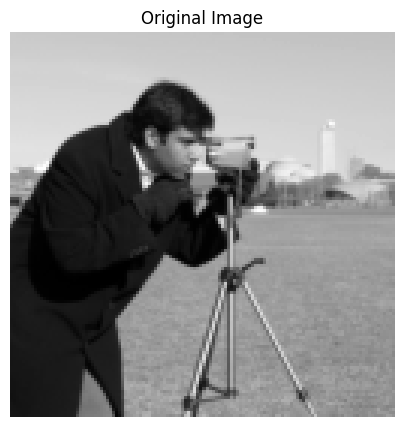

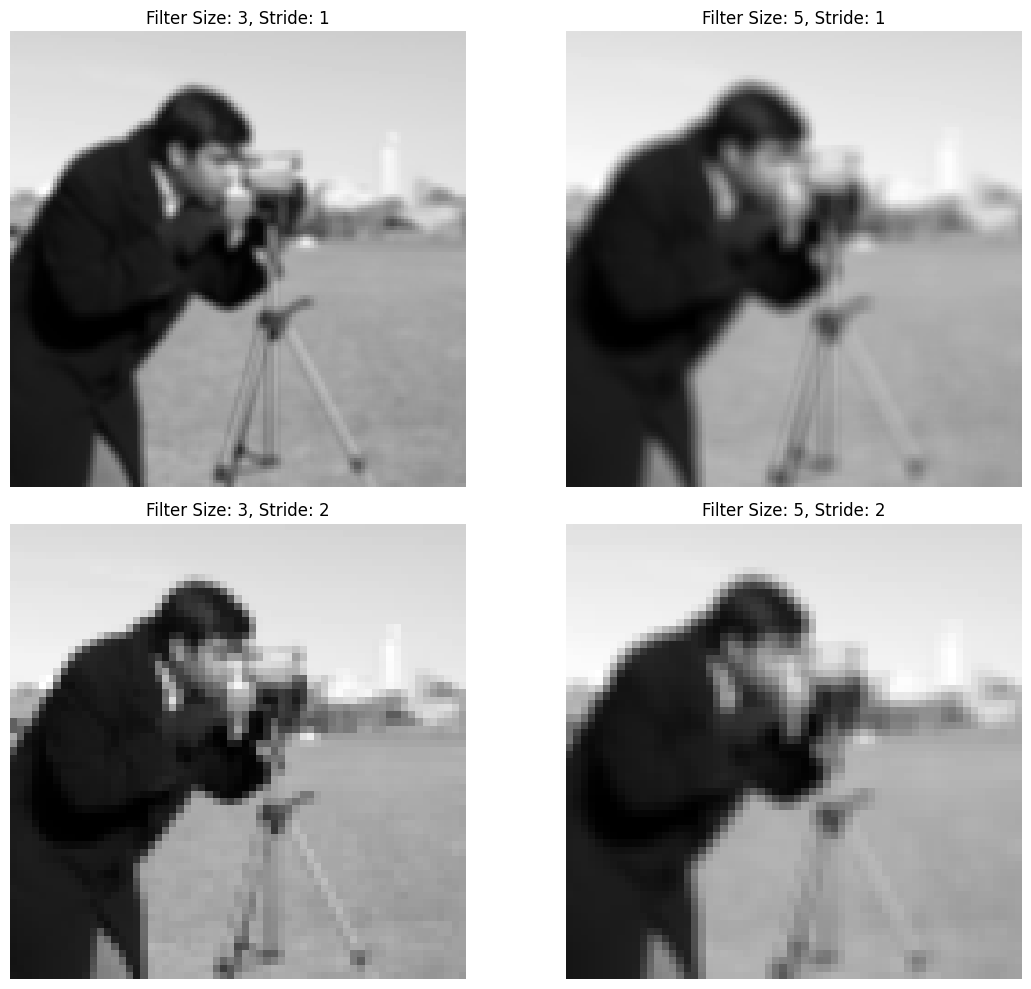

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import data
from skimage.transform import resize

# Load an example grayscale image (no need to convert to grayscale)
image = data.camera()  # Sample grayscale image from skimage
image = resize(image, (128, 128))  # Resize to make operations faster
plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Define a function to apply convolution
def apply_convolution(image, filter_size, stride):
    # Create a simple filter (e.g., edge detection kernel)
    kernel = np.ones((filter_size, filter_size)) / (filter_size**2)  # Averaging filter
    feature_map = convolve2d(image, kernel, mode='valid')[::stride, ::stride]
    return feature_map

# Test convolution with varying filter sizes and strides
configurations = [
    {"filter_size": 3, "stride": 1},
    {"filter_size": 5, "stride": 1},
    {"filter_size": 3, "stride": 2},
    {"filter_size": 5, "stride": 2},
]

# Visualize the results
plt.figure(figsize=(12, 10))
for idx, config in enumerate(configurations, 1):
    filter_size = config['filter_size']
    stride = config['stride']
    feature_map = apply_convolution(image, filter_size, stride)

    plt.subplot(2, 2, idx)
    plt.imshow(feature_map, cmap='gray')
    plt.title(f"Filter Size: {filter_size}, Stride: {stride}")
    plt.axis('off')

plt.tight_layout()
plt.show()


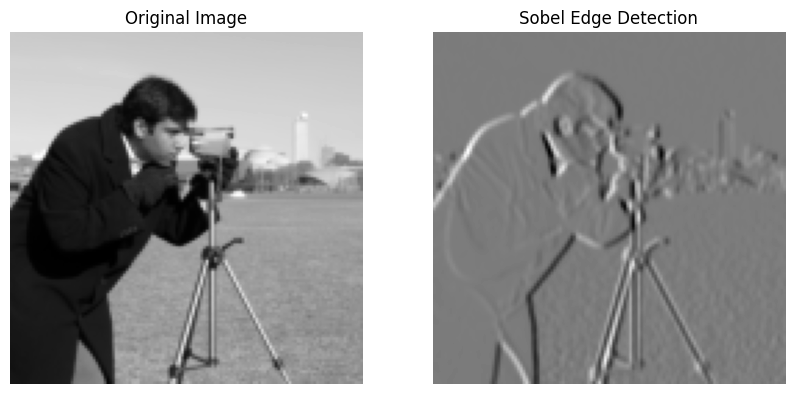

In [ ]:
from scipy.signal import convolve2d

def apply_convolution(image, filter_size=None, stride=1, use_sobel=False):
    if use_sobel:
        # Sobel kernel for edge detection (horizontal detection as an example)
        kernel = np.array([[-1, 0, 1],
                           [-2, 0, 2],
                           [-1, 0, 1]])  # Horizontal Sobel filter
    else:
        # Averaging filter (default if Sobel is not used)
        kernel = np.ones((filter_size, filter_size)) / (filter_size**2)

    # Apply convolution and adjust for stride
    feature_map = convolve2d(image, kernel, mode='valid')[::stride, ::stride]
    return feature_map
feature_map = apply_convolution(image, use_sobel=True, stride=1)
plt.figure(figsize=(10, 5))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Feature Map with Sobel Filter
sobel_feature_map = apply_convolution(image, use_sobel=True, stride=1)
plt.subplot(1, 2, 2)
plt.imshow(sobel_feature_map, cmap='gray')
plt.title("Sobel Edge Detection")
plt.axis('off')

plt.show()


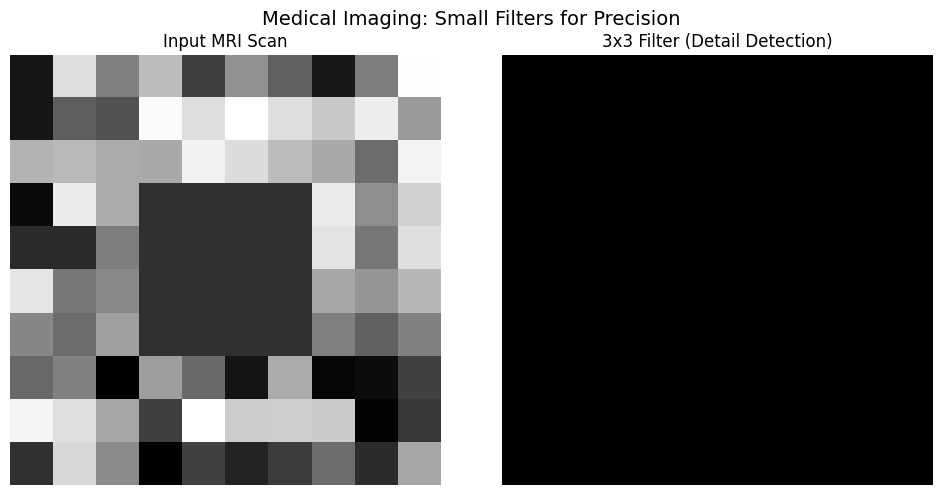

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a grayscale "MRI-like" image
image = np.random.rand(10, 10)
for i in range(3, 7):
    for j in range(3, 7):
        image[i][j] = 0.2  # Simulate a "tumor" region

# Define a 3x3 filter
filter_kernel = np.ones((3, 3)) * 0.5

# Plot the original image and filter
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Input MRI Scan")
ax[0].axis("off")

ax[1].imshow(filter_kernel, cmap="gray")
ax[1].set_title("3x3 Filter (Detail Detection)")
ax[1].axis("off")

plt.suptitle("Medical Imaging: Small Filters for Precision", fontsize=14)
plt.tight_layout()
plt.show()


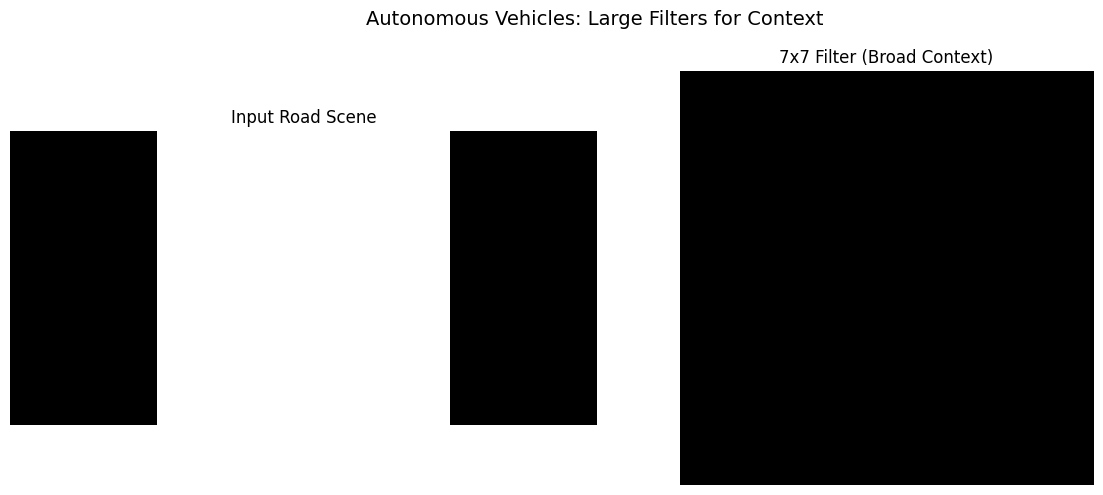

In [ ]:
# Create a simulated road image
road_image = np.zeros((10, 20))
road_image[:, 5:15] = 0.5  # Simulate a road in the center

# Define a 7x7 filter
large_filter = np.ones((7, 7)) * 0.2

# Plot the road image and large filter
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(road_image, cmap="gray")
ax[0].set_title("Input Road Scene")
ax[0].axis("off")

ax[1].imshow(large_filter, cmap="gray")
ax[1].set_title("7x7 Filter (Broad Context)")
ax[1].axis("off")

plt.suptitle("Autonomous Vehicles: Large Filters for Context", fontsize=14)
plt.tight_layout()
plt.show()


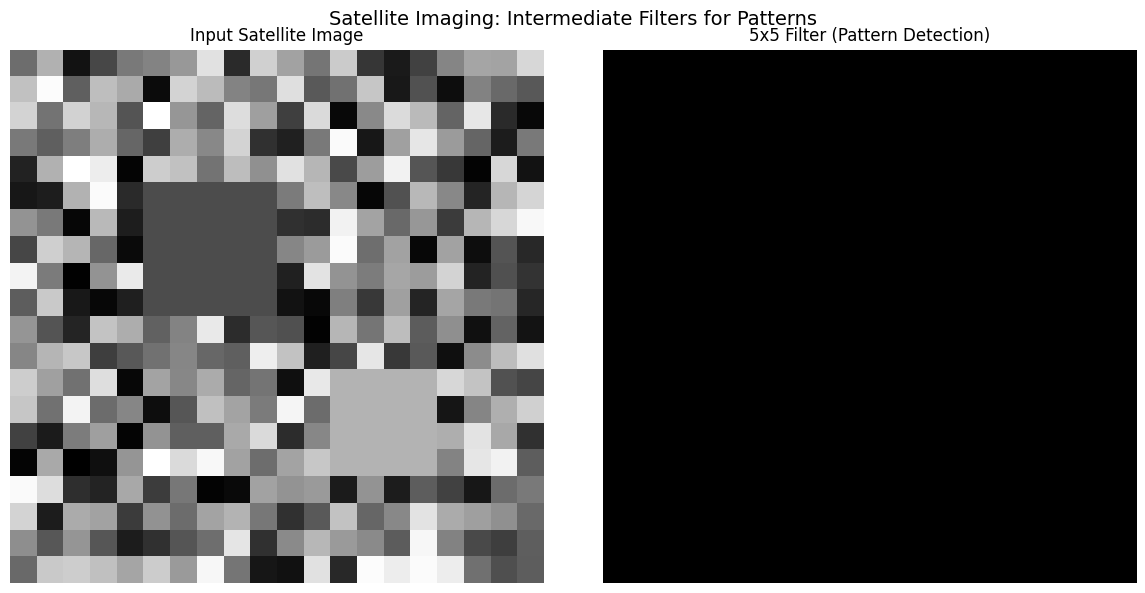

In [ ]:
# Create a simulated satellite image with patterns
satellite_image = np.random.rand(20, 20)
satellite_image[5:10, 5:10] = 0.3  # Simulate a cloud region
satellite_image[12:16, 12:16] = 0.7  # Simulate a storm region

# Define a 5x5 filter
intermediate_filter = np.ones((5, 5)) * 0.5

# Plot the satellite image and intermediate filter
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].imshow(satellite_image, cmap="gray")
ax[0].set_title("Input Satellite Image")
ax[0].axis("off")

ax[1].imshow(intermediate_filter, cmap="gray")
ax[1].set_title("5x5 Filter (Pattern Detection)")
ax[1].axis("off")

plt.suptitle("Satellite Imaging: Intermediate Filters for Patterns", fontsize=14)
plt.tight_layout()
plt.show()


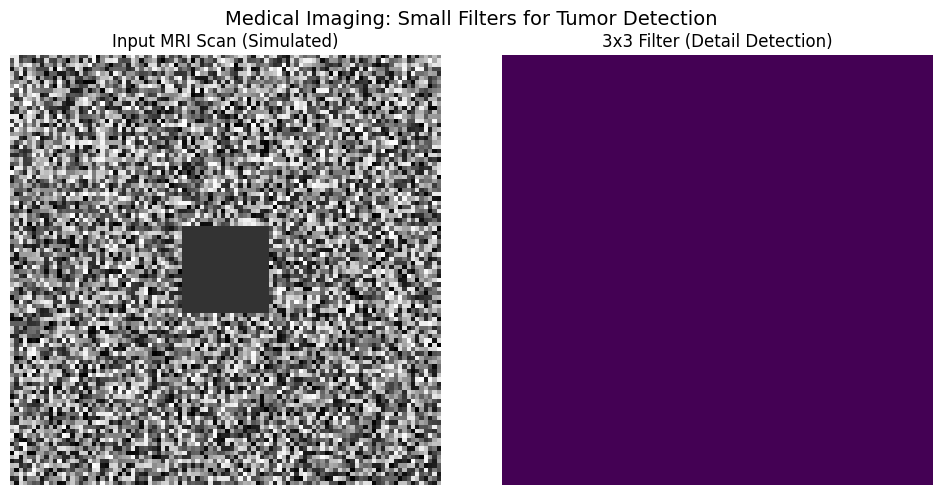

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Create a simulated grayscale MRI-like image
image = np.random.rand(100, 100)
image[40:60, 40:60] = 0.2  # Simulate a "tumor" region

# Define a 3x3 filter kernel
filter_kernel = np.ones((3, 3)) * 0.5

# Visualize input image and filter kernel
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(image, cmap="gray")
ax[0].set_title("Input MRI Scan (Simulated)")
ax[0].axis("off")

ax[1].imshow(filter_kernel, cmap="viridis")
ax[1].set_title("3x3 Filter (Detail Detection)")
ax[1].axis("off")

plt.suptitle("Medical Imaging: Small Filters for Tumor Detection", fontsize=14)
plt.tight_layout()
plt.show()
